In [329]:


import pandas as pd
import numpy as np
from matplotlib import pyplot
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [330]:
sal=pd.read_csv('MNC_Salaries.csv')


In [331]:
sal.head()

,Name,Team,Number,Position,Age,DOJ,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0


In [332]:
sal.isnull().values.any()

True

In [333]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      457 non-null    object 
 1   Team      457 non-null    object 
 2   Number    457 non-null    int64  
 3   Position  457 non-null    object 
 4   Age       457 non-null    int64  
 5   DOJ       457 non-null    object 
 6   Weight    457 non-null    int64  
 7   College   373 non-null    object 
 8   Salary    446 non-null    float64
dtypes: float64(1), int64(3), object(5)
memory usage: 32.3+ KB


In [334]:
sal[sal['Salary']==sal['Salary'].max()]['Name']

109    Kobe Bryant
Name: Name, dtype: object

In [335]:
sal[sal['Salary']==sal['Salary'].min()]['Name']

32    Thanasis Antetokounmpo
Name: Name, dtype: object

In [336]:
sal['Position'].nunique()

5

In [337]:
sal['Position'].value_counts().head(5)

SG    102
PF    100
PG     92
SF     85
C      78
Name: Position, dtype: int64

In [338]:
sal.isnull().sum()

Name         0
Team         0
Number       0
Position     0
Age          0
DOJ          0
Weight       0
College     84
Salary      11
dtype: int64

In [339]:
for col in ['Salary']:
    sal[col].fillna(sal[col].mode()[0],inplace=True)

In [340]:
sal.isnull().sum()

Name         0
Team         0
Number       0
Position     0
Age          0
DOJ          0
Weight       0
College     84
Salary       0
dtype: int64

In [341]:
sal.head()

,Name,Team,Number,Position,Age,DOJ,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,947276.0
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0


In [342]:
del sal['College']

In [343]:
sal.isnull().sum()

Name        0
Team        0
Number      0
Position    0
Age         0
DOJ         0
Weight      0
Salary      0
dtype: int64

In [344]:

x=sal.drop(['Salary'],axis=1)
y=sal['Salary']

In [345]:
x.head()

,Name,Team,Number,Position,Age,DOJ,Weight
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235
2,John Holland,Boston Celtics,30,SG,27,06-May,205
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231


In [346]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      457 non-null    object 
 1   Team      457 non-null    object 
 2   Number    457 non-null    int64  
 3   Position  457 non-null    object 
 4   Age       457 non-null    int64  
 5   DOJ       457 non-null    object 
 6   Weight    457 non-null    int64  
 7   Salary    457 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 28.7+ KB


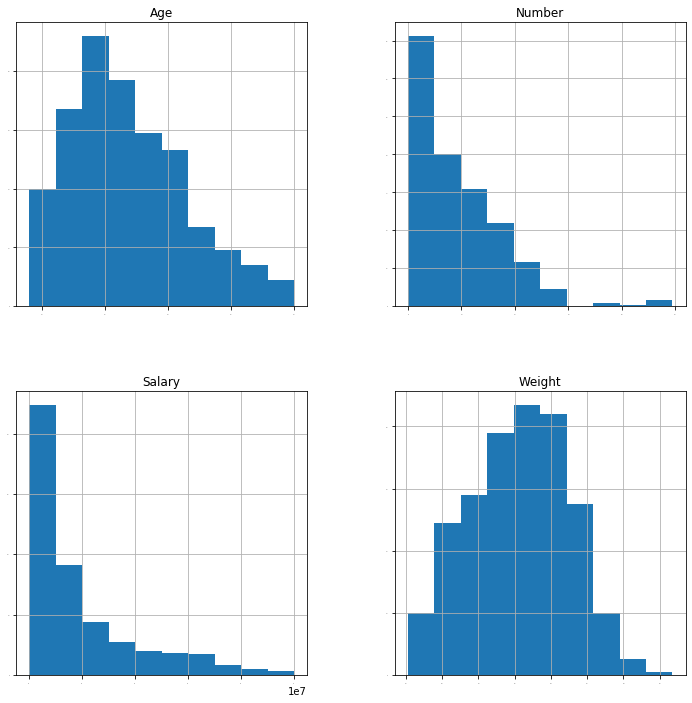

In [347]:
sal.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))
pyplot.show()

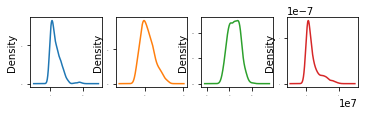

In [348]:
sal.plot(kind='density', subplots=True, layout=(8,8), sharex=False, legend=False, fontsize=1, figsize=(12,12))
pyplot.show()

In [349]:
from sklearn.preprocessing import LabelEncoder

In [350]:
le = LabelEncoder()

In [351]:
for col in sal.columns:
    if sal[col].dtype=='object':
        sal[col] = le.fit_transform(sal[col])

In [352]:
sal.head()

,Name,Team,Number,Position,Age,DOJ,Weight,Salary
0,34,1,0,2,25,4,180,7730337.0
1,171,1,99,3,25,7,235,6796117.0
2,211,1,30,4,27,9,205,947276.0
3,355,1,28,4,22,9,185,1148640.0
4,216,1,8,1,29,11,231,5000000.0


In [353]:
X=sal[['Name','Team','Number','Position','Age','DOJ','Weight','Salary']]

In [354]:
Y=sal.Salary

In [355]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [356]:
from sklearn.metrics import accuracy_score

In [357]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [358]:
from sklearn.model_selection import train_test_split

In [359]:
x_train, x_test, y_train, y_test = train_test_split (X, Y, test_size=0.33, random_state=42)

In [360]:
model = []

In [361]:
model.append(("LR",LogisticRegression()))
model.append(("LDA",LinearDiscriminantAnalysis()))
model.append(("KNN",KNeighborsClassifier()))
model.append(("CART",DecisionTreeClassifier()))
model.append(("NB",GaussianNB()))
model.append(("RF",RandomForestClassifier()))



In [362]:
result = []

In [363]:
names = []

In [364]:
from sklearn import model_selection

In [365]:
for name,models in model:
    kfold = model_selection.KFold(n_splits=10,random_state=7)
    cv_result=model_selection.cross_val_score(models,x_train,y_train,cv=kfold,scoring="accuracy")
    result.append(cv_result)
    names.append(name)
    msg="%s,%f(%f)"%(name,cv_result.mean(),cv_result.std())
    print(msg)
    

/home/sudhakar/enter/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/home/sudhakar/enter/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/sudhakar/enter/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS 

LR,0.000000(0.000000)
LDA,0.055699(0.029576)


/home/sudhakar/enter/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/home/sudhakar/enter/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


KNN,0.271183(0.079396)
CART,0.245161(0.065632)


/home/sudhakar/enter/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


NB,0.356129(0.075551)


/home/sudhakar/enter/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


RF,0.176452(0.052998)


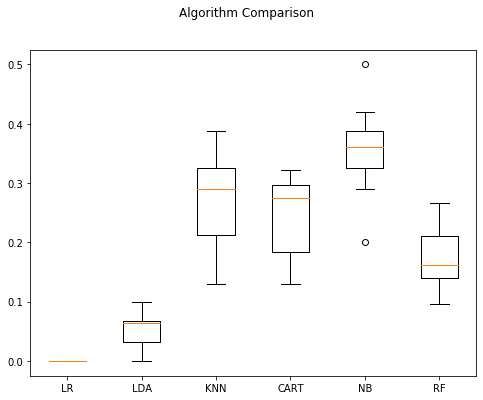

In [367]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(result)
ax.set_xticklabels(names)
fig.set_size_inches(8,6)
pyplot.show()